In [1]:
!pip install statsmodels
!pip install pmdarima


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pmdarima as pm

In [3]:
df = pd.read_csv('/Users/anushakansal/Downloads/vgsales.csv')
df = df.dropna(subset=['Year', 'Publisher'])  # Remove missing years/publishers
df['Year'] = df['Year'].astype(int)

In [4]:
df


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [6]:
df.shape
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000
mean,8290.190228,2006.405561,0.265647,0.147731,0.078833,0.048426,0.540910
std,4792.654450,5.832412,0.822432,0.509303,0.311879,0.190083,1.567345
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4132.500000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8292.000000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12439.500000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16291 non-null  int64  
 1   Name          16291 non-null  object 
 2   Platform      16291 non-null  object 
 3   Year          16291 non-null  int64  
 4   Genre         16291 non-null  object 
 5   Publisher     16291 non-null  object 
 6   NA_Sales      16291 non-null  float64
 7   EU_Sales      16291 non-null  float64
 8   JP_Sales      16291 non-null  float64
 9   Other_Sales   16291 non-null  float64
 10  Global_Sales  16291 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 1.5+ MB


In [9]:
df.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [10]:
df['Regional_Sales'] = df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales'] + df['Other_Sales']
df


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Regional_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,35.83
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01,0.00
16596,16599,Know How 2,DS,2010,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01,0.01


<Axes: xlabel='Publisher'>

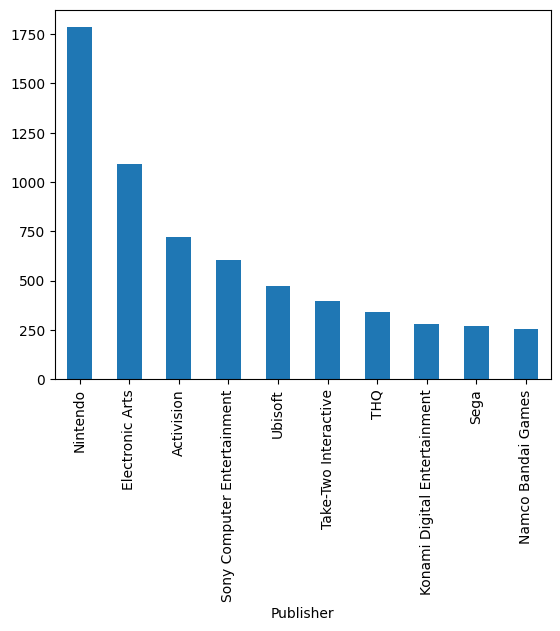

In [11]:
#Top publishers by global sales
top_publishers = df.groupby('Publisher')['Global_Sales'].sum().nlargest(10)
top_publishers.plot(kind='bar')

<Axes: xlabel='Year'>

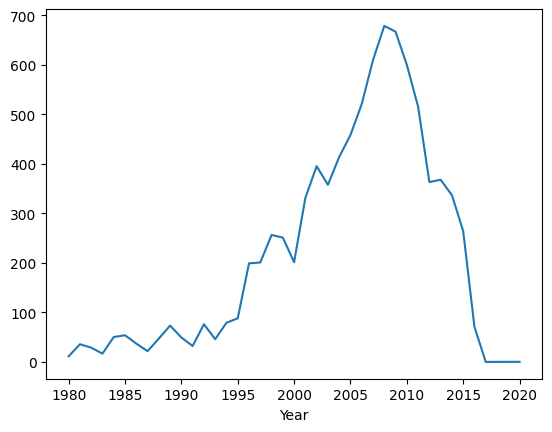

In [12]:
#Sales trends by year
df.groupby('Year')['Global_Sales'].sum().plot(kind='line')

<Axes: ylabel='count'>

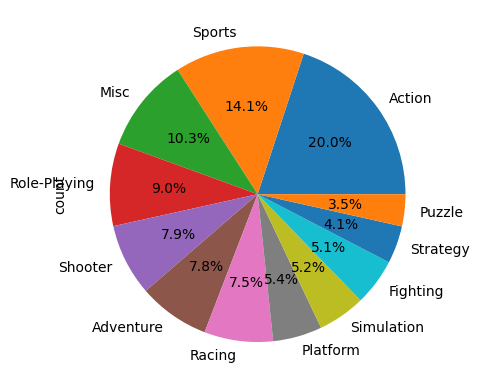

In [13]:
df['Genre'].value_counts().plot(kind='pie', autopct='%1.1f%%')

In [14]:
#Platform has highest average sales
platform_sales = df.groupby('Platform')['Global_Sales'].mean().idxmax()
print(platform_sales,"has the highest average sales")

GB has the highest average sales


<Axes: xlabel='Year'>

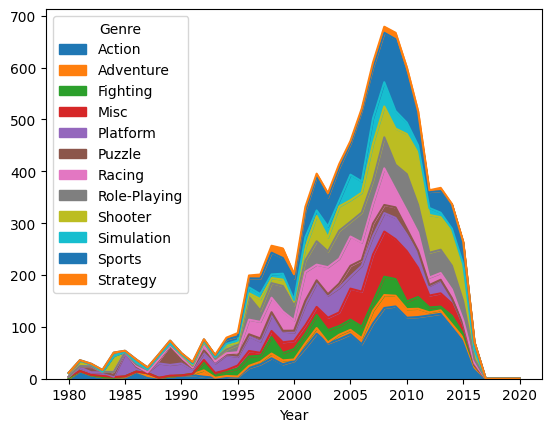

In [15]:
#Trends in sales for specific genres over the years
genre_trends = df.groupby(['Year', 'Genre'])['Global_Sales'].sum().unstack()
genre_trends.plot(kind='area', stacked=True)

In [17]:
#  Publisher Performance Benchmarking
publisher_stats = df.groupby('Publisher').agg(
    Total_Sales=('Global_Sales', 'sum'),
    Game_Count=('Name', 'count'),
    Avg_Sales_Per_Game=('Global_Sales', 'mean'),
    Median_NA_Sales=('NA_Sales', 'median'),
    EU_Ratio=('EU_Sales', lambda x: (x / x.sum()).mean())
).reset_index()

total_sales = publisher_stats['Total_Sales'].sum()
publisher_stats['Market_Share'] = publisher_stats['Total_Sales'] / total_sales * 100
publisher_stats['Efficiency_Score'] = publisher_stats['Avg_Sales_Per_Game'] / publisher_stats['Median_NA_Sales']

# Top 20 publishers by market share
top_publishers = publisher_stats.nlargest(20, 'Market_Share').sort_values('Market_Share', ascending=False)


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Regional_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,35.83
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01,0.00
16596,16599,Know How 2,DS,2010,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01,0.01


In [18]:
#  Genre Portfolio Analysis
genre_portfolio = df.groupby('Genre').agg(
    Mean_Sales=('Global_Sales', 'mean'),
    Sales_Std=('Global_Sales', 'std'),
    Success_Rate=('Global_Sales', lambda x: (x > 1).mean())  # % of games selling >1M copies
).reset_index()
genre_portfolio['Return_Risk_Ratio'] = genre_portfolio['Mean_Sales'] / genre_portfolio['Sales_Std']


In [19]:
# Acquisition Target Scoring
publisher_stats['Acquisition_Score'] = (publisher_stats['Efficiency_Score'] * 
                                        publisher_stats['EU_Ratio'] / 
                                        publisher_stats['Market_Share'])
acquisition_targets = publisher_stats.nlargest(10, 'Acquisition_Score')

In [22]:


# Aggregate annual sales
annual_sales = df.groupby('Year')['Global_Sales'].sum().reset_index()

# Filter data up to 2016
annual_sales = annual_sales[annual_sales['Year'] <= 2016]

# Convert Year to datetime and set as PeriodIndex
annual_sales['Year'] = pd.to_datetime(annual_sales['Year'], format='%Y')
annual_sales.set_index('Year', inplace=True)
annual_sales.index = annual_sales.index.to_period('Y')  # Critical conversion

# Fit SARIMA model
model = pm.auto_arima(annual_sales, 
                       seasonal=True, 
                       m=5,  # Annual seasonality (5-year cycles)
                       stepwise=True,
                       trace=True,  # Enable for debugging
                       error_action='ignore',
                       suppress_warnings=True)

# Build SARIMAX model with identified parameters
sarima_model = SARIMAX(annual_sales,
                       order=model.order,
                       seasonal_order=model.seasonal_order)

# Fit model
results = sarima_model.fit(disp=False)

# Forecast next 5 years (2017-2021)
forecast = results.get_forecast(steps=5)
forecast_mean = forecast.predicted_mean
conf_int = forecast.conf_int()

# Create PeriodIndex for forecast period
forecast_index = pd.period_range(
    start=annual_sales.index[-1] + 1,  # Start after last observed year
    periods=5,
    freq='Y'
)

# Assign new index to forecast
forecast_mean.index = forecast_index
conf_int.index = forecast_index

# Print results
print("Global Sales Forecast (2017-2021):")
print(forecast_mean.round(2))
print("\nConfidence Intervals:")
print(conf_int.round(2))


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[5] intercept   : AIC=inf, Time=0.45 sec
 ARIMA(0,1,0)(0,0,0)[5] intercept   : AIC=406.043, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[5] intercept   : AIC=404.899, Time=0.03 sec
 ARIMA(0,1,1)(0,0,1)[5] intercept   : AIC=405.762, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[5]             : AIC=404.067, Time=0.00 sec
 ARIMA(0,1,0)(1,0,0)[5] intercept   : AIC=407.436, Time=0.02 sec
 ARIMA(0,1,0)(0,0,1)[5] intercept   : AIC=407.225, Time=0.03 sec
 ARIMA(0,1,0)(1,0,1)[5] intercept   : AIC=inf, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[5] intercept   : AIC=403.195, Time=0.01 sec
 ARIMA(1,1,0)(0,0,1)[5] intercept   : AIC=404.851, Time=0.06 sec
 ARIMA(1,1,0)(1,0,1)[5] intercept   : AIC=406.838, Time=0.05 sec
 ARIMA(2,1,0)(0,0,0)[5] intercept   : AIC=404.839, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[5] intercept   : AIC=404.134, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[5] intercept   : AIC=404.299, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[5] intercept   : AIC=406.029, Time

In [23]:
# 5-year forecast (2017-2021)
forecast = results.get_forecast(steps=5)
forecast_mean = forecast.predicted_mean
conf_int = forecast.conf_int()

# Visualization
plt.figure(figsize=(15, 12))

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

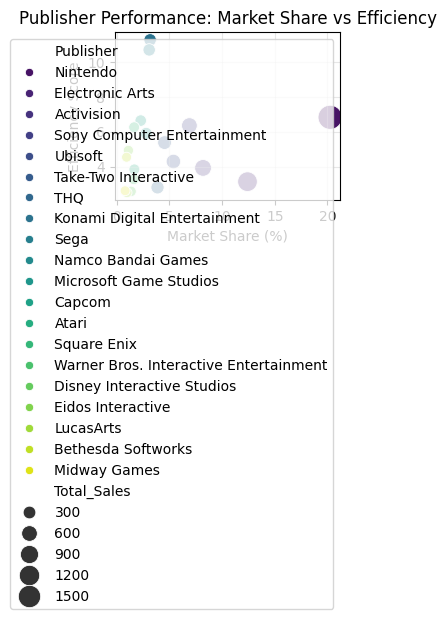

In [24]:
# Publisher Performance
plt.subplot(221)
sns.scatterplot(data=top_publishers, x='Market_Share', y='Efficiency_Score', 
                size='Total_Sales', hue='Publisher', sizes=(50, 300), palette='viridis')
plt.title('Publisher Performance: Market Share vs Efficiency')
plt.xlabel('Market Share (%)')
plt.ylabel('Efficiency Score')
plt.grid(alpha=0.3)

Text(0, 0.5, 'Genre')

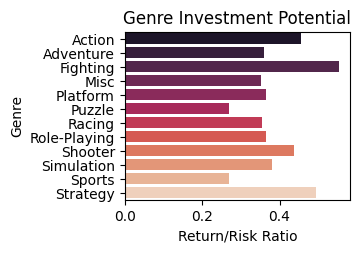

In [26]:
# Genre Portfolio
plt.subplot(222)
sns.barplot(
    data=genre_portfolio, 
    x='Return_Risk_Ratio', 
    y='Genre',
    hue='Genre',
    palette='rocket',
    dodge=False,
    legend=False
)
plt.title('Genre Investment Potential')
plt.xlabel('Return/Risk Ratio')
plt.ylabel('Genre')

Text(0, 0.5, 'Publisher')

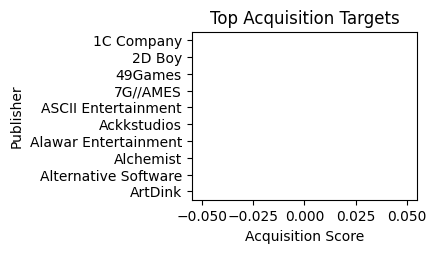

In [29]:
# Acquisition Targets
plt.subplot(223)
sns.barplot(
    data=acquisition_targets,
    x='Acquisition_Score',
    y='Publisher',
    hue='Publisher',           # Add this
    palette='mako',
    dodge=False,               # Add this
    legend=False               # Add this
)
plt.title('Top Acquisition Targets')
plt.xlabel('Acquisition Score')
plt.ylabel('Publisher')


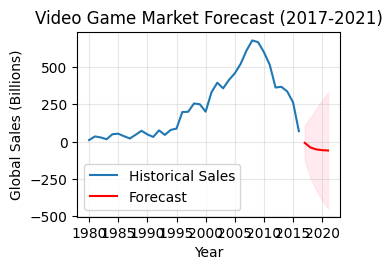

In [31]:
# Sales Forecast
# Convert PeriodIndex to DateTimeIndex for plotting
historical_index = annual_sales.index.to_timestamp()
forecast_index = forecast_mean.index.to_timestamp()
conf_int.index = conf_int.index.to_timestamp()

# Plot with converted indexes
plt.plot(historical_index, annual_sales.values, label='Historical Sales')
plt.plot(forecast_index, forecast_mean.values, color='red', label='Forecast')
plt.fill_between(conf_int.index, conf_int.iloc[:,0], conf_int.iloc[:,1], color='pink', alpha=0.3)

plt.title('Video Game Market Forecast (2017-2021)')
plt.xlabel('Year')
plt.ylabel('Global Sales (Billions)')
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.savefig('gaming_industry_analysis.png', dpi=300)
plt.show()


In [32]:
# Key Insights Output
print("="*80)
print("Gaming Industry Analysis Report")
print("="*80)
print("\nTop 5 Publishers by Market Share:")
print(top_publishers[['Publisher', 'Market_Share', 'Efficiency_Score']].head(5).to_string(index=False))

print("\nGenre Investment Profile:")
print(genre_portfolio[['Genre', 'Return_Risk_Ratio', 'Success_Rate']].sort_values('Return_Risk_Ratio', ascending=False).to_string(index=False))

print("\nTop Acquisition Targets:")
print(acquisition_targets[['Publisher', 'Acquisition_Score']].sort_values('Acquisition_Score', ascending=False).to_string(index=False))

print("\nMarket Forecast (2017-2021):")
print(forecast_mean.round(2))


Gaming Industry Analysis Report

Top 5 Publishers by Market Share:
                  Publisher  Market_Share  Efficiency_Score
                   Nintendo     20.250069          6.836897
            Electronic Arts     12.408009          3.140662
                 Activision      8.186705          3.930533
Sony Computer Entertainment      6.891535          6.360285
                    Ubisoft      5.373827          4.298656

Genre Investment Profile:
       Genre  Return_Risk_Ratio  Success_Rate
    Fighting           0.554496      0.144737
    Strategy           0.492993      0.046269
      Action           0.454793      0.127653
     Shooter           0.436561      0.191108
  Simulation           0.380877      0.109670
Role-Playing           0.365923      0.136735
    Platform           0.364461      0.221714
   Adventure           0.360415      0.031397
      Racing           0.353692      0.145306
        Misc           0.351678      0.096679
      Sports           0.269960      0.1